In [1]:
import pandas as pd

C:\Users\Aanand\AppData\Local\Temp\ipykernel_20000\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv('autompg.csv', sep='\s+', header=None, na_values='?')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Aanand\AppData\Local\Temp\ipykernel_20000\2931179415.py:1: SyntaxWarning: invalid escape sequence '\s'
  dataset = pd.read_csv('autompg.csv', sep='\s+', header=None, na_values='?')


In [3]:
dataset.shape

(398, 9)

In [4]:
dataset.isna().sum()

0    0
1    0
2    0
3    6
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [5]:
dataset = dataset.dropna()
dataset.shape

(392, 9)

In [6]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset[8] = le.fit_transform(dataset[8])
print(dataset.head())

      0  1      2      3       4     5   6  7    8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1   48
1  15.0  8  350.0  165.0  3693.0  11.5  70  1   35
2  18.0  8  318.0  150.0  3436.0  11.0  70  1  229
3  16.0  8  304.0  150.0  3433.0  12.0  70  1   13
4  17.0  8  302.0  140.0  3449.0  10.5  70  1  159


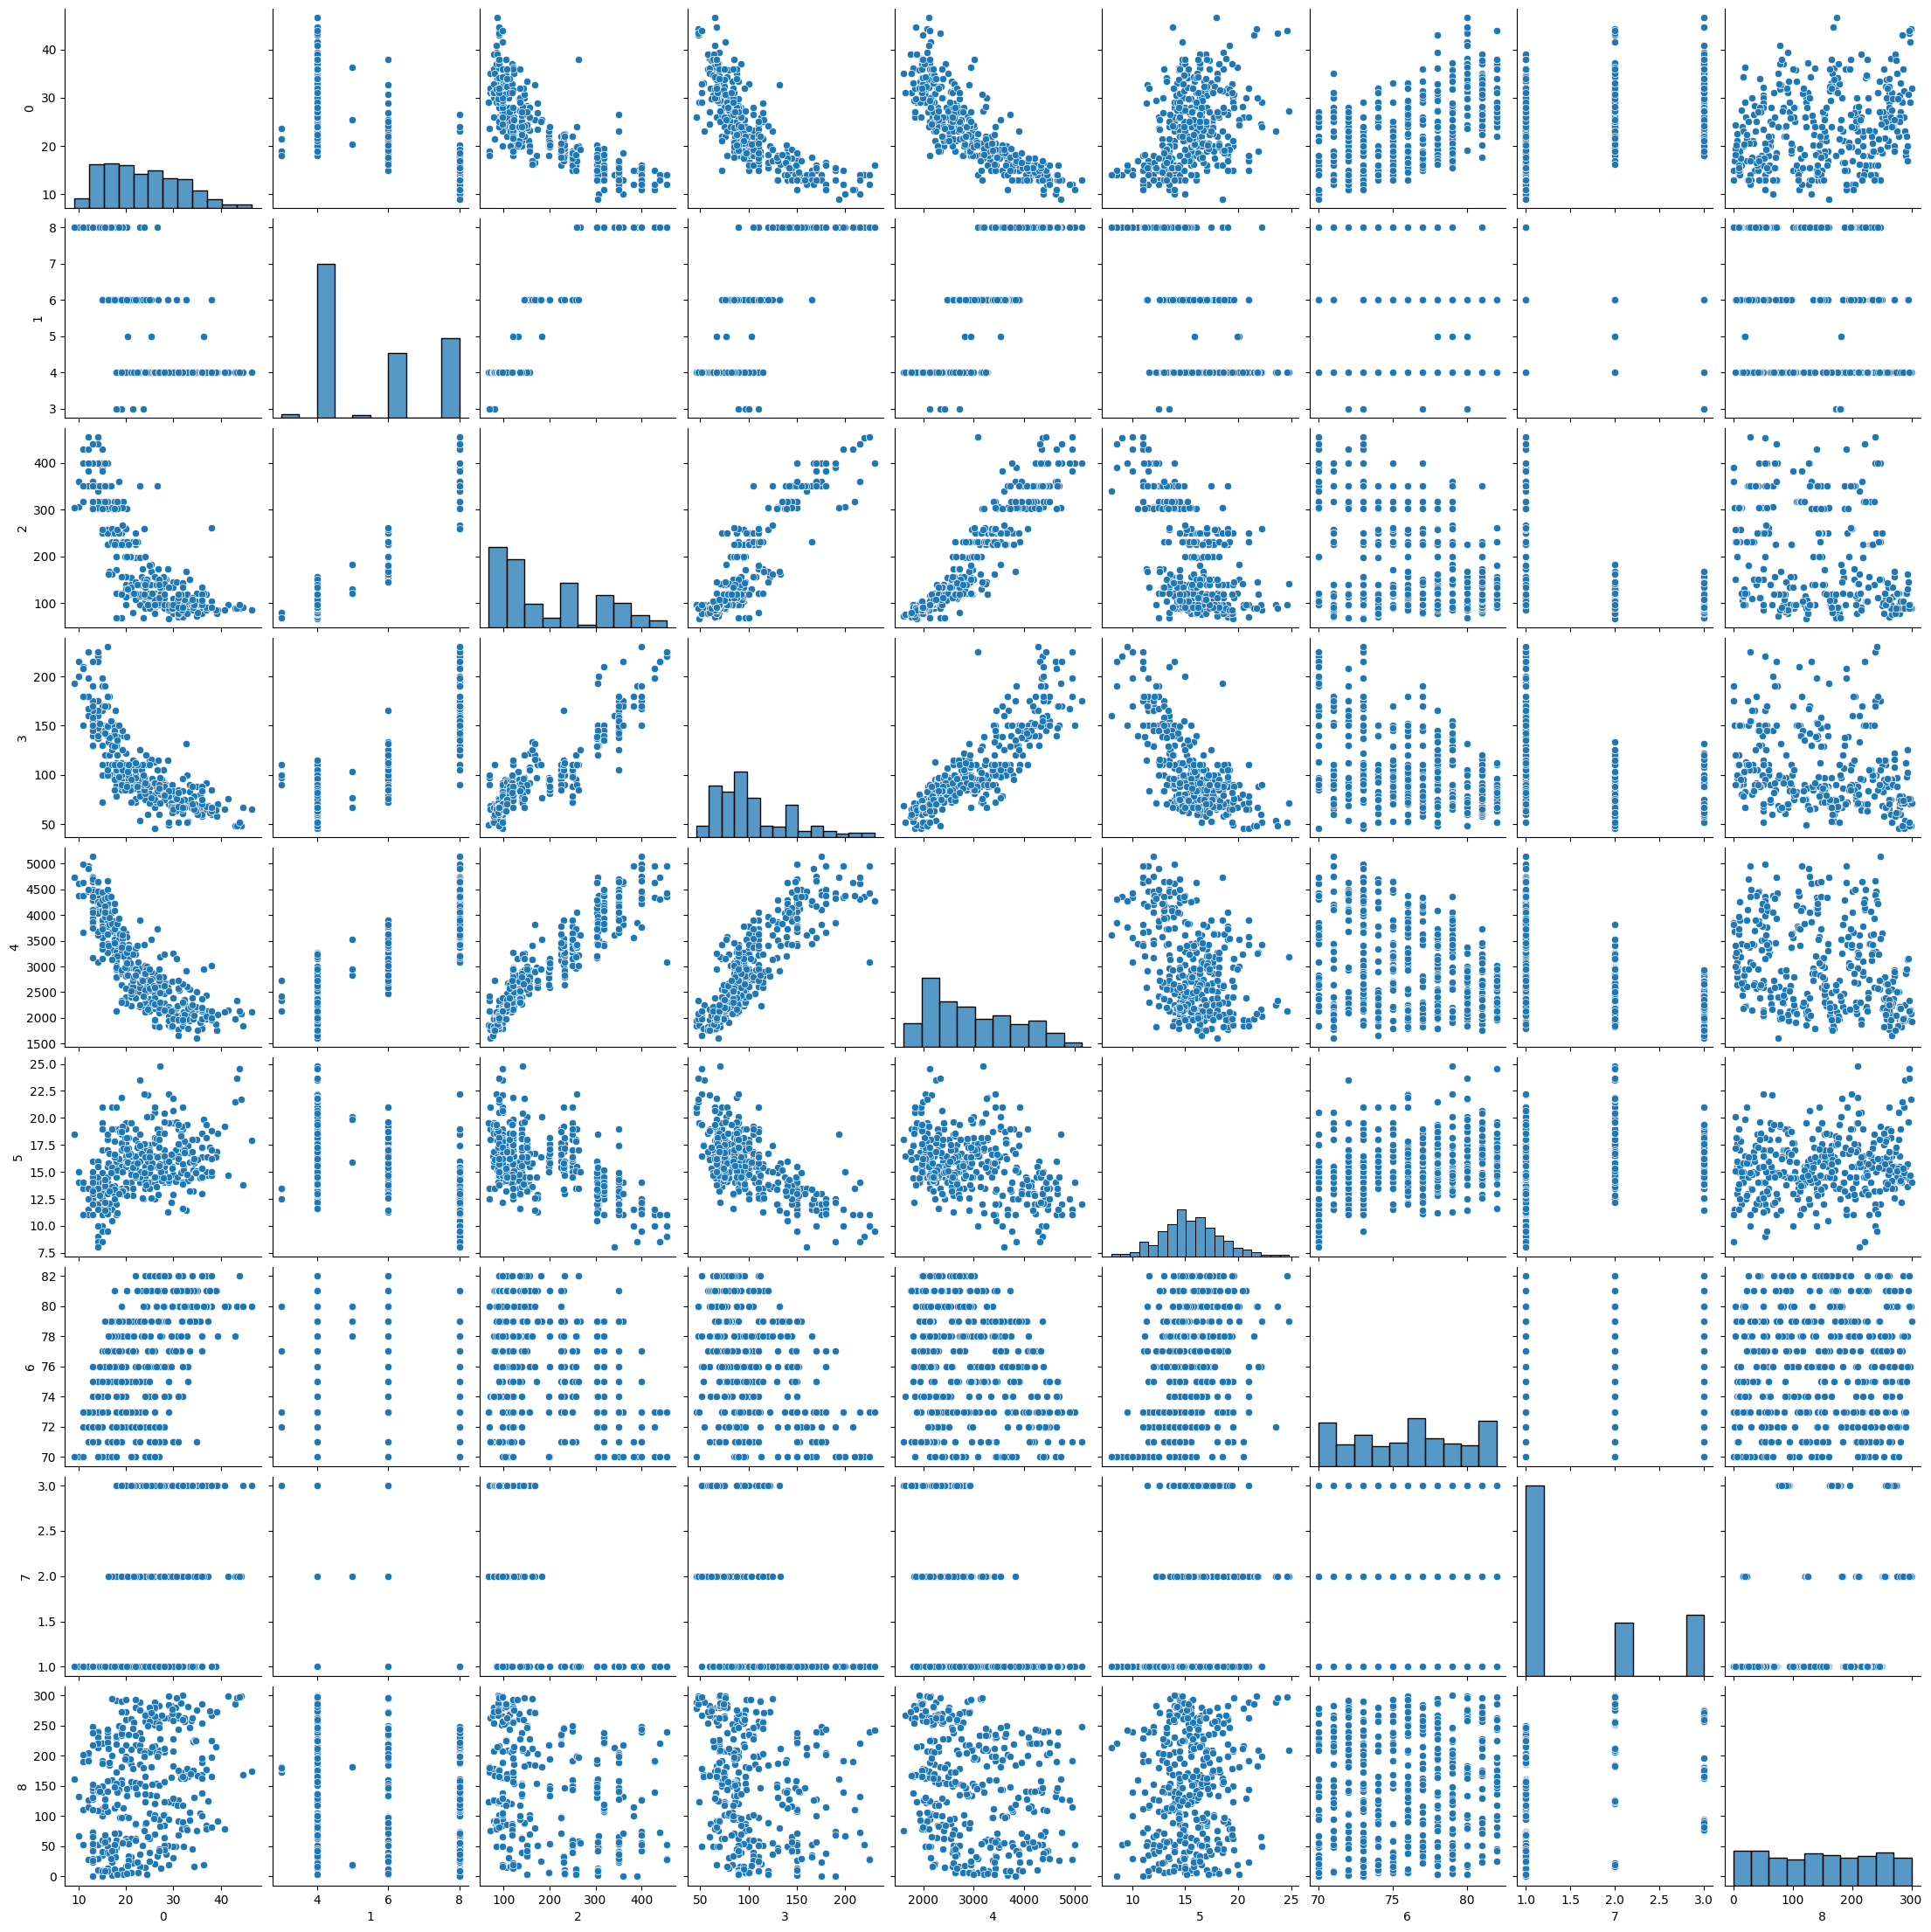

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dataset)
plt.show()

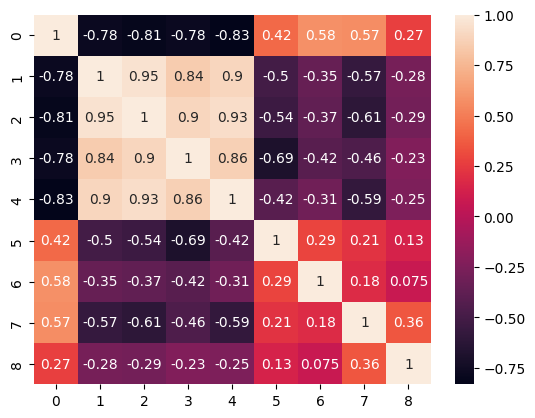

In [9]:
import numpy as np
corr = np.corrcoef(dataset.values.T)
hm = sns.heatmap(corr, annot=True)
plt.show()

In [10]:
dataset = dataset.drop(columns=[6,8])
print(dataset.shape)

(392, 7)


In [11]:
target = dataset[1]

In [12]:
features = dataset.drop(columns=[1])
print(features.head())

      0      2      3       4     5  7
0  18.0  307.0  130.0  3504.0  12.0  1
1  15.0  350.0  165.0  3693.0  11.5  1
2  18.0  318.0  150.0  3436.0  11.0  1
3  16.0  304.0  150.0  3433.0  12.0  1
4  17.0  302.0  140.0  3449.0  10.5  1


In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(features, target, test_size=0.15)

In [14]:
print(ytrain)

190    8
267    4
273    4
220    4
5      8
      ..
137    8
357    4
377    4
11     8
235    4
Name: 1, Length: 333, dtype: int64


In [15]:
print(xtrain.shape)
print(xtest.shape)

(333, 6)
(59, 6)


In [16]:
xtrain.describe()

,0,2,3,4,5,7
count,333.000000,333.000000,333.000000,333.00000,333.000000,333.000000
mean,23.354354,198.151652,105.573574,3003.75976,15.477778,1.567568
std,7.938371,104.766516,38.788717,847.48696,2.752685,0.802349
min,9.000000,70.000000,46.000000,1613.00000,8.000000,1.000000
25%,17.000000,105.000000,78.000000,2254.00000,13.600000,1.000000
50%,22.000000,151.000000,95.000000,2868.00000,15.500000,1.000000
75%,29.000000,302.000000,130.000000,3645.00000,17.000000,2.000000
max,46.600000,455.000000,230.000000,4997.00000,24.800000,3.000000


In [17]:
ytrain.describe()

count    333.000000
mean       5.543544
std        1.715116
min        3.000000
25%        4.000000
50%        5.000000
75%        8.000000
max        8.000000
Name: 1, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_std = sc.fit_transform(xtrain)
xtest_std = sc.transform(xtest)

In [19]:
pd.DataFrame(xtrain_std).describe()

,0,1,2,3,4,5
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,1.960394e-16,-1.040209e-16,1.133561e-16,1.773690e-16,-6.961398e-16,1.600321e-17
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-1.810945e+00,-1.225053e+00,-1.538159e+00,-1.643509e+00,-2.720627e+00,-7.084468e-01
25%,-8.016654e-01,-8.904738e-01,-7.119356e-01,-8.860173e-01,-6.831888e-01,-7.084468e-01
50%,-1.708654e-01,-4.507414e-01,-2.730043e-01,-1.604320e-01,8.085074e-03,-7.084468e-01
75%,7.122547e-01,9.927278e-01,6.306779e-01,7.577760e-01,5.538276e-01,5.397690e-01
max,2.932671e+00,2.455316e+00,3.212627e+00,2.355481e+00,3.391689e+00,1.787985e+00


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(xtrain_std, ytrain)

LinearRegression()

In [22]:
lr_train_result = lr.predict(xtrain_std)
lr_test_result = lr.predict(xtest_std)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
print("Training Result")
print("MSE:", mean_squared_error(ytrain, lr_train_result))
print("R2_score:", r2_score(ytrain, lr_train_result))

Training Result
MSE: 0.26671033966090363
R2_score: 0.9090591338175542


In [25]:
print("Testing Result")
print("MSE:", mean_squared_error(ytest, lr_test_result))
print("R2_score:", r2_score(ytest, lr_test_result))

Testing Result
MSE: 0.29198083227748833
R2_score: 0.8849461990991695
